In [170]:
# About the Dataset
# This dataset provides information on honey production in the United States over several years. It includes details such as:

# Year: The year of production.
# State: The state where honey was produced.
# Production: The amount of honey produced (in pounds).
# Price: The price per pound of honey.
# Value of Production: The total value generated by honey production.
# The dataset is valuable for analyzing trends in honey production, identifying top-producing states, and exploring how production correlates with price and value.

# We will do eda on this dataset.

In [62]:
# setting up necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("US_honey_dataset.csv")
data.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [5]:
# checking shape of the data 
data.shape

(1115, 9)

In [7]:
# checking null values 
data.isnull().sum()

Unnamed: 0             0
state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [11]:
# checking for duplicates values 
data.duplicated().sum()

0

In [13]:
# dropping unnecessary columns
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

#### Now we will answer some question based on dataset.

#### Q1- Which states are rarely contributing to honey production for the last 27 years?

In [26]:
contri=data.groupby(["state"])["production"].sum().reset_index()
contri

,state,production
0,Alabama,14467000
1,Arizona,38844000
2,Arkansas,51846000
3,California,423876000
4,Colorado,32660000
5,Florida,280934000
6,Georgia,57426000
7,Hawaii,15420000
8,Idaho,87188000
9,Illinois,9864000


In [154]:
rarely_contri=contri.sort_values(by="production",ascending=True)    
rarely_contri

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000
39,Virginia,5153000
41,WestVirginia,6411000
35,Tennessee,6857000
24,NewJersey,6913000
38,Vermont,7032000


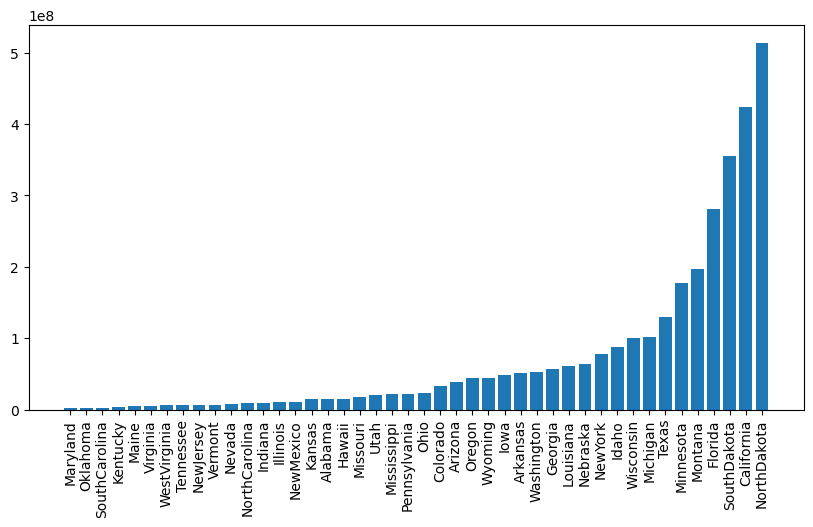

In [160]:
# analyzing by graph
x=rarely_contri["state"]
y=rarely_contri["production"]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [162]:
# ans- top 5 rarely contributing states 
rarely_contri.head()

,state,production
16,Maryland,1975000
30,Oklahoma,2055000
33,SouthCarolina,2823000
13,Kentucky,3224000
15,Maine,4762000


#### Q2-Which are the top5 Honey producing states in the US?

In [82]:
top_5_states=data.groupby(["state"])["production"].sum().reset_index().sort_values(by="production",ascending=False).reset_index(drop=True).head()
top_5_states

,state,production
0,NorthDakota,513742000
1,California,423876000
2,SouthDakota,355726000
3,Florida,280934000
4,Montana,197173000


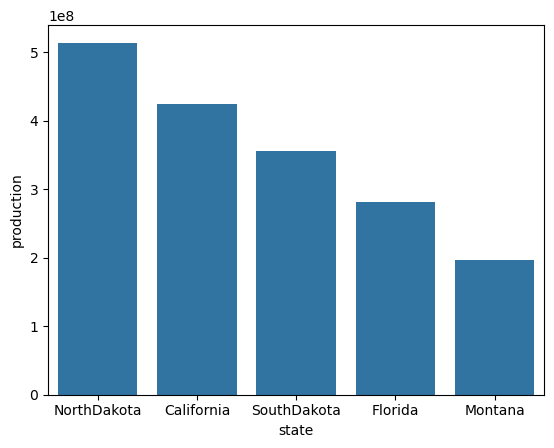

In [164]:
# analyzing by graph
sns.barplot(x="state",y="production",data=top_5_states)
plt.show()

#### Q3-  What is the Change in mean Average price of Honey from 1995 to 2021?

In [166]:
data.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [94]:
avg_price_in_years=data.groupby(["year"])["average_price"].mean()

In [112]:
avg_price_in_years

year
1995     74.840909
1996     99.568182
1997     91.325581
1998     83.720930
1999     80.325581
2000     79.023256
2001     88.465116
2002    133.204545
2003    151.068182
2004    132.350000
2005    116.341463
2006    134.341463
2007    140.170732
2008    160.878049
2009    176.195122
2010    192.900000
2011    216.725000
2012    236.700000
2013    260.717949
2014    282.025000
2015    292.625000
2016    291.925000
2017    302.775000
2018      3.083500
2019      2.925500
2020      3.050000
2021      3.334250
Name: average_price, dtype: float64

In [100]:
change_mean=avg_price_in_years.loc[1995]-avg_price_in_years[2021]
change_mean

71.5066590909091

In [130]:
# 71 is the change in mean Average price of Honey from 1995 to 2021

#### Q4-  Which was the year when production of Honey in whole US was the highest?

In [110]:
highest_honey_production_year=data.groupby(["year"])["production"].sum().reset_index().nlargest(1,"production")
highest_honey_production_year

,year,production
5,2000,220320000


In [168]:
#  2000 was the year ehen production of honey in whole us was he highest

#### Q5- From the above inference we get the production was highest in the year 2000,now let
 #### infer which state was having highest contribution in that year

In [114]:
highest_honey_production_year=data.groupby(["year"])["production"].sum().reset_index().nlargest(1,"production")
highest_honey_production_year

,year,state,production
3,1995,California,39060000


In [120]:
df=data[data["year"]==2000]

In [132]:
highest_contributor_state_in_2000=df.groupby(["state"])["production"].sum().reset_index().sort_values(by="production",ascending=False).reset_index().head(1)
highest_contributor_state_in_2000

,index,state,production
0,28,NorthDakota,33350000


In [128]:
# northdakota is answer

#### Q6- Which states have the highest no. of colonies in the year 2000? 

In [146]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000


In [150]:
top_most_colonies_in_2000=df.groupby(["state"])["colonies_number"].sum().reset_index().sort_values(by="colonies_number",ascending=False).head(1)
top_most_colonies_in_2000

,state,colonies_number
3,California,440000


In [152]:
# California is the answer